(46412, 1440)
(1440,)
(1440,)
(-71.95, 1510.95)



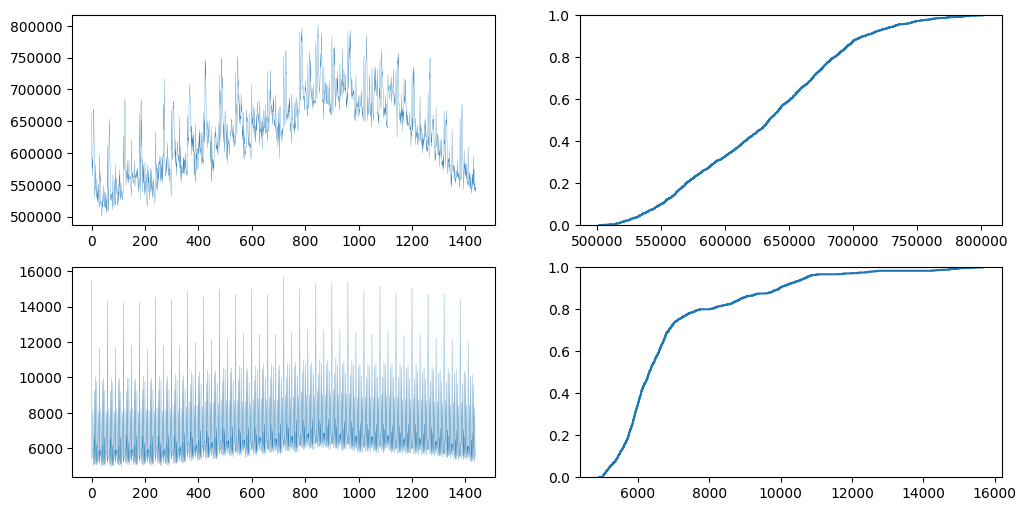

In [16]:
# %%
import numpy as np
import pandas as pd
import os, sys, re
import matplotlib.pyplot as plt


AZURE_TRACE_2019 = "../../workload_data/azurefunctions-dataset2019/invocations_per_function_md.anon.d01.csv"

# read trace
trace_df = pd.read_csv(AZURE_TRACE_2019)
columns = trace_df.columns[4:]

# plot
trace_df = trace_df[columns[0: 1440]]

print(trace_df.to_numpy().shape)

total_rps = trace_df.sum(axis=0)
request_func = (trace_df > 0).sum(axis=0)

print(total_rps.shape)
print(request_func.shape)

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax[0, 0].plot(np.arange(total_rps.shape[0]), total_rps, lw=0.2)
ax[0, 1].ecdf(total_rps)
ax[1, 0].plot(np.arange(request_func.shape[0]), request_func, lw=0.2)
ax[1, 1].ecdf(request_func)

print(ax[0, 0].get_xlim())
print(ax[0, 0].get_xlabel())

plt.show()

func_total_rps = trace_df.sum(axis=1)
func_total_rps = func_total_rps.sort_values(ascending=False)
func_total_rps_by_acc_pct = np.zeros(100)
for i in range(100):
    func_total_rps_by_acc_pct[i] = func_total_rps[:int(func_total_rps.shape[0] * (i + 1) / 100)].sum()
func_total_rps_by_acc_pct /= func_total_rps.sum()
func_total_rps_by_acc_pct_2019 = func_total_rps_by_acc_pct

{'e3cdb48830f66eb8689cc0223514569a69812b77e6611e3d59814fac0747bd2f': 0, '337cd24a7d5fd5c92460faee4ebe6a186a0eb322bd17b73da7ffa153025794e1': 1, '48cc770d590d3c5a7691b3b4e9302f82ec3be5ddc2a037d94ad2e76f44dd8946': 2, '3d2aee54a133509f16fb636d74128c2adcfcac71c6dcef78fda1ace004f2ab47': 3, '68bbfd828223a505d7917339f4656c5f33ff93225cdb9d0fcbc9889edb49253a': 4, '34f4775366e51728635af48df1a96d332cf1565eee069a0030f12966ae760274': 5, '49535532e285d1ef68b0a7b8c3bc3973b36ec38a4c594ec9f1412084c27036ff': 6, 'e6df36937abcf1f6d0be4f2e3ffd12d98717dd6f29a9cd233790506517888daf': 7, 'cd9f7f333d59aede8088772edac3bff78c45e2dad8eb498b450b9af511452a36': 8, 'e02465de583b6ceffa5b78cce5f10eb27e714a8a6b3aed483be50f30a924071f': 9, '4a4146ed669e9c0bdb2c7db94558df4ec44bf31ec5609d066408de4a4215efbd': 10, '514a9bcff07d21b5580057748e55e78bb062e3001a01b75b497939d5378cc78c': 11, 'ebfe951bf36afd91115e54adab000c6325a83146c5f14e75ca03a16ed38f3831': 12, 'd880a3e25b4baf00977b29491a01e9cf3bfd963a31b2013859d67b2b43291d74': 13, '

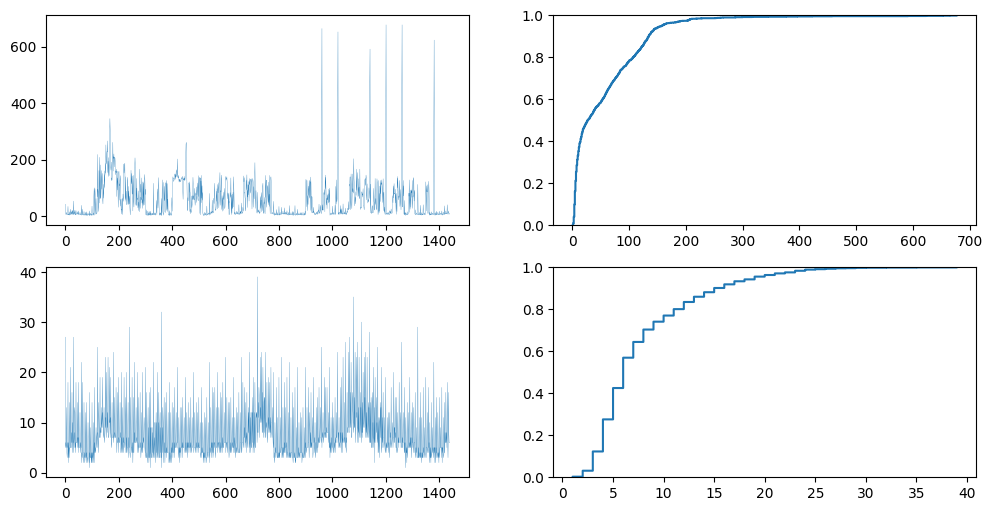

In [24]:
AZURE_TRACE_2021 = "../../workload_data/azurefunctions-dataset2021/AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt"

# read trace
trace_df = pd.read_csv(AZURE_TRACE_2021)

# parse first day into 2019 format
func_name_map = {}
for func in trace_df['func']:
    if func not in func_name_map:
        func_name_map[func] = len(func_name_map)
num_functions = len(func_name_map)

new_trace_df = np.zeros((num_functions, 1440))
print(func_name_map)

for row in trace_df.iterrows():
    func = row[1]['func']
    end_timestamp = row[1]['end_timestamp']
    duration = row[1]['duration']
    start_timestamp = end_timestamp - duration
    start_timestamp = int(start_timestamp / 60) # sec -> min
    if start_timestamp >= 1440:
        break
    # print(func_name_map[func], start_timestamp)
    new_trace_df[func_name_map[func]][start_timestamp] += 1


total_rps = new_trace_df.sum(axis=0)
request_func = (new_trace_df > 0).sum(axis=0)

print(total_rps.shape, request_func.shape)

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax[0, 0].plot(total_rps, lw=0.2)
ax[0, 1].ecdf(total_rps)
ax[1, 0].plot(request_func, lw=0.2)
ax[1, 1].ecdf(request_func)

plt.show()

func_total_rps = new_trace_df.sum(axis=1)
func_total_rps[::-1].sort()
func_total_rps_by_acc_pct = np.zeros(100)
for i in range(100):
    func_total_rps_by_acc_pct[i] = func_total_rps[:int(func_total_rps.shape[0] * (i + 1) / 100)].sum()
func_total_rps_by_acc_pct /= func_total_rps.sum()
func_total_rps_by_acc_pct_2021 = func_total_rps_by_acc_pct

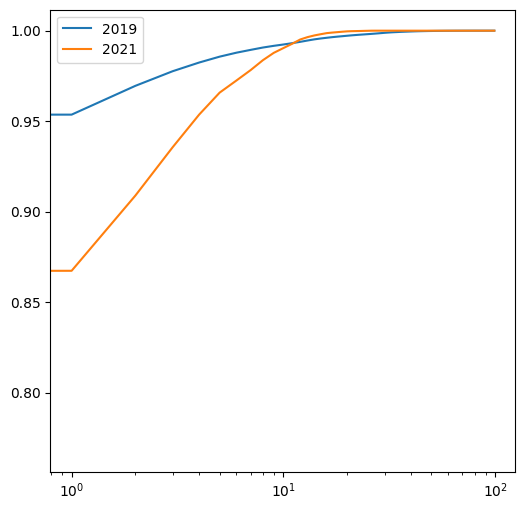

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(np.arange(100), func_total_rps_by_acc_pct_2019, label='2019')
ax.plot(np.arange(100), func_total_rps_by_acc_pct_2021, label='2021')
ax.legend()
ax.set_xscale('log')
plt.show()